In [1]:
#Import and Magic Cell
import pandas as pd
import matplotlib.pyplot as plt
%xmode Verbose 

Exception reporting mode: Verbose


In [2]:
df=pd.read_csv(r"~\Portfolio Projects\marketing_campaign.csv",
               sep='\t') #separating value is a '\t' or a tab
#source: https://www.kaggle.com/imakash3011/customer-personality-analysis?select=marketing_campaign.csv

# Exploratory Analysis

In [3]:
df.head() #does not show every column

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
print("The names of the columns are: ", df.columns.tolist()) #need to see every column name so I can call them later

The names of the columns are:  ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']


In [5]:
#size of the dataset
print("There are "+str(df.shape[0])+" records in the dataframe with "+str(df.shape[1])+" columns.")

There are 2240 records in the dataframe with 29 columns.


In [6]:
#datatypes under each column
print(df.dtypes)

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object


In [7]:
#double checking the "object" result for some columns, as well as Dt_Customer column (which should contain date) to see whether cleaning is necessary
print("Education : "+str(type(df.loc[0,"Education"]))+" : "+str((df.loc[0,"Education"])))
print("Marital_Status : "+str(type(df.loc[0, "Marital_Status"]))+" : "+str(df.loc[0, "Marital_Status"]))
print("\nDt_Customer: "+str(type(df.loc[0, "Dt_Customer"]))+" : "+str((df.loc[0,"Dt_Customer"]))) #this should be a pandas.Datetime object

Education : <class 'str'> : Graduation
Marital_Status : <class 'str'> : Single

Dt_Customer: <class 'str'> : 04-09-2012


In [8]:
#possible str data in each column, as well as number of occurences
print(df["Education"].value_counts())
print()
print(df["Marital_Status"].value_counts())

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


In [9]:
#info about numeric columns
pd.set_option('display.max_columns', None) #I want to see every column. I know from an earlier cell that the dataframe is only 29 columns which isn't terrible.      
df.describe() #looks like a few columns are a binary 0 or 1. Will change to boolean True/False when cleaning. No documentation was provided for these columns.

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [10]:
#any nulls, NaNs, etc?
df.isnull().sum() #there are 24 nulls in the income category

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

# Data Cleaning

In [11]:
#remove records with nulls
df=df.dropna()
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [12]:
#need to change str to datetime for "Dt_Customer" column
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
print("Dt_Customer: "+str(type(df.loc[0, "Dt_Customer"]))+" : "+str((df.loc[0,"Dt_Customer"])))

Dt_Customer: <class 'pandas._libs.tslibs.timestamps.Timestamp'> : 2012-09-04 00:00:00


In [13]:
#need to change 0 / 1 to True/False for columns "AcceptedCmp1" through "AcceptedCmp5" and "Complain"
myStr="AcceptedCmp"
for i in range(1, 6):
    myStr+=str(i)
    df[myStr].replace({0: False, 1: True}, inplace=True)
    print(myStr+" : "+str(type(df.loc[0, myStr]))+" : "+str((df.loc[0, myStr])))
    myStr=myStr[:-1]
df["Complain"].replace({0: False, 1: True}, inplace=True)
print("Complain : "+str(type(df.loc[0, "Complain"]))+" : "+str((df.loc[0, "Complain"])))
df["Response"].replace({0: False, 1: True}, inplace=True)
print("Response : "+str(type(df.loc[0, "Response"]))+" : "+str((df.loc[0, "Response"])))

AcceptedCmp1 : <class 'numpy.bool_'> : False
AcceptedCmp2 : <class 'numpy.bool_'> : False
AcceptedCmp3 : <class 'numpy.bool_'> : False
AcceptedCmp4 : <class 'numpy.bool_'> : False
AcceptedCmp5 : <class 'numpy.bool_'> : False
Complain : <class 'numpy.bool_'> : False
Response : <class 'numpy.bool_'> : True


# Exploration Part 2 :
Things that couldn't be done before the data was cleaned

In [14]:
#date range for column "Dt_Customer"
print(str(df['Dt_Customer'].dt.date.min())+" through "+str(df['Dt_Customer'].dt.date.max()))

2012-07-30 through 2014-06-29


In [15]:
#how many are true/false for boolean columns
myStr="AcceptedCmp"
for i in range(1, 6):
    myStr+=str(i)
    print(df[myStr].value_counts())
    print(df[myStr].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
    print()
    myStr=myStr[:-1]
print(df["Complain"].value_counts())
print(df["Complain"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
print()
print(df["Response"].value_counts())
print(df["Response"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

False    2074
True      142
Name: AcceptedCmp1, dtype: int64
False    93.6%
True      6.4%
Name: AcceptedCmp1, dtype: object

False    2186
True       30
Name: AcceptedCmp2, dtype: int64
False    98.6%
True      1.4%
Name: AcceptedCmp2, dtype: object

False    2053
True      163
Name: AcceptedCmp3, dtype: int64
False    92.6%
True      7.4%
Name: AcceptedCmp3, dtype: object

False    2052
True      164
Name: AcceptedCmp4, dtype: int64
False    92.6%
True      7.4%
Name: AcceptedCmp4, dtype: object

False    2054
True      162
Name: AcceptedCmp5, dtype: int64
False    92.7%
True      7.3%
Name: AcceptedCmp5, dtype: object

False    2195
True       21
Name: Complain, dtype: int64
False    99.1%
True      0.9%
Name: Complain, dtype: object

False    1883
True      333
Name: Response, dtype: int64
False    85.0%
True     15.0%
Name: Response, dtype: object


# Visual Exploration

<class 'pandas.core.series.Series'>


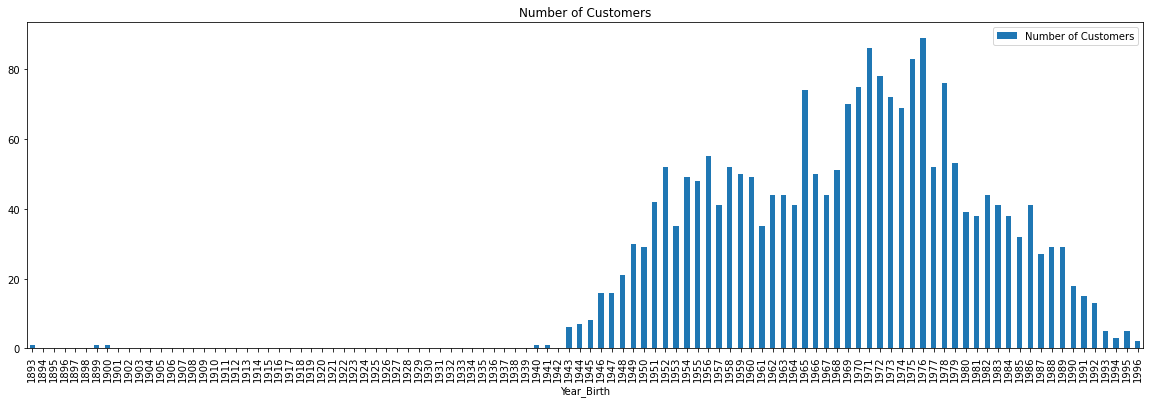

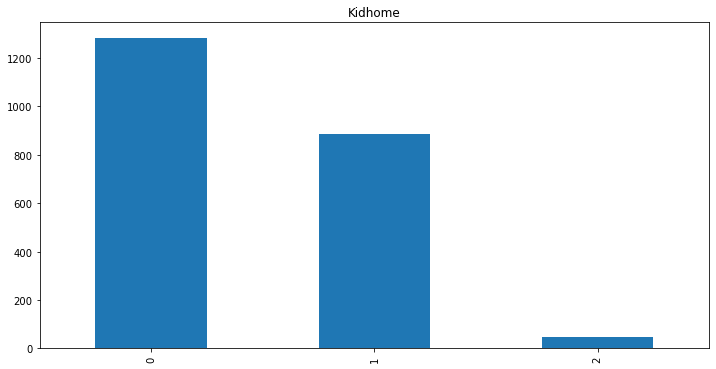

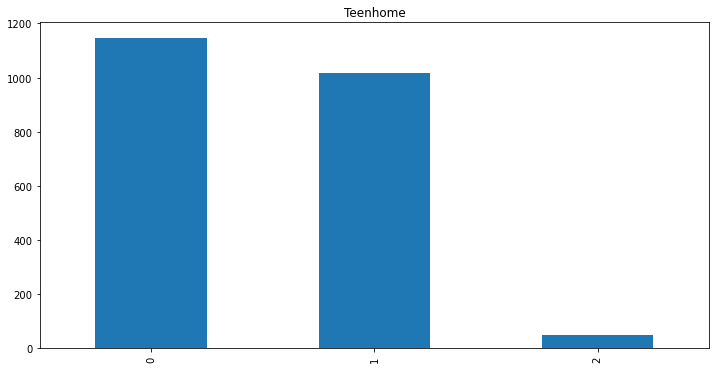

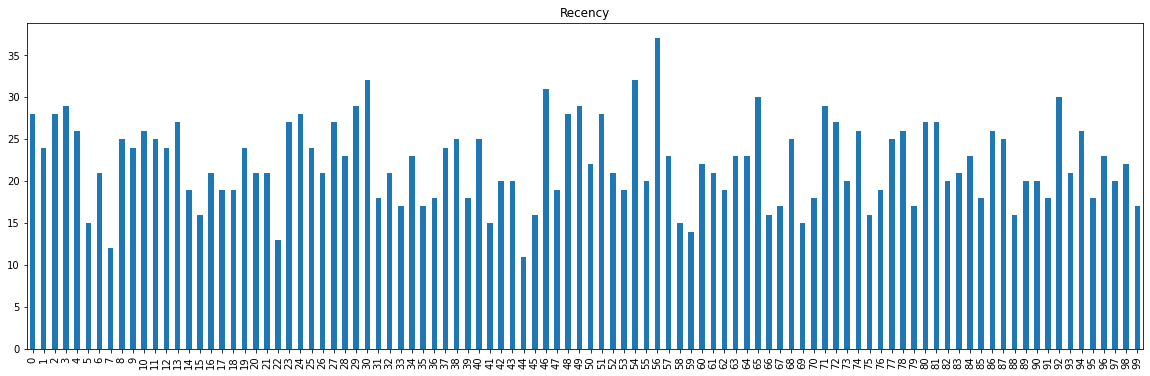

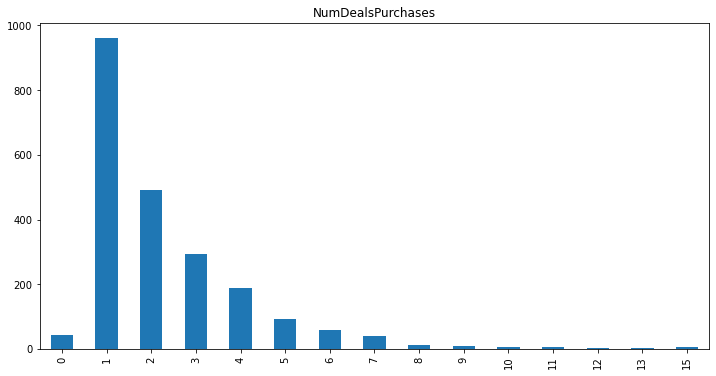

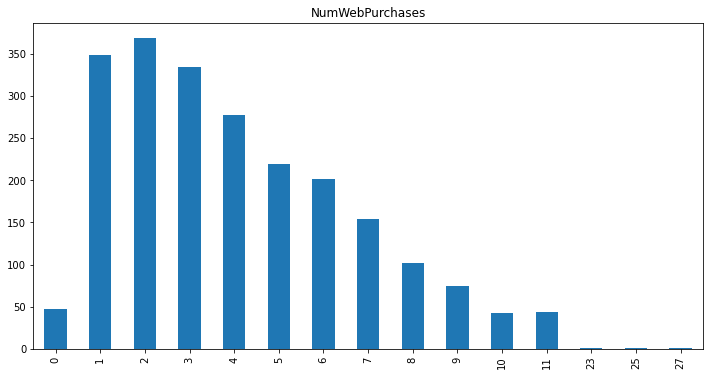

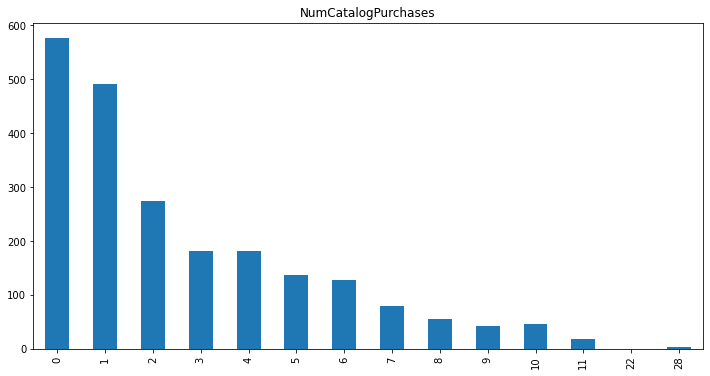

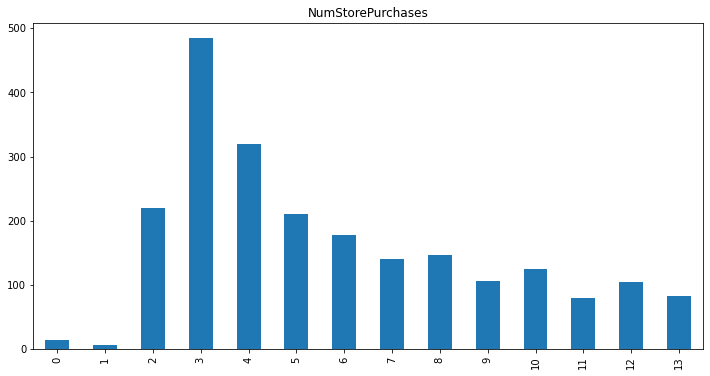

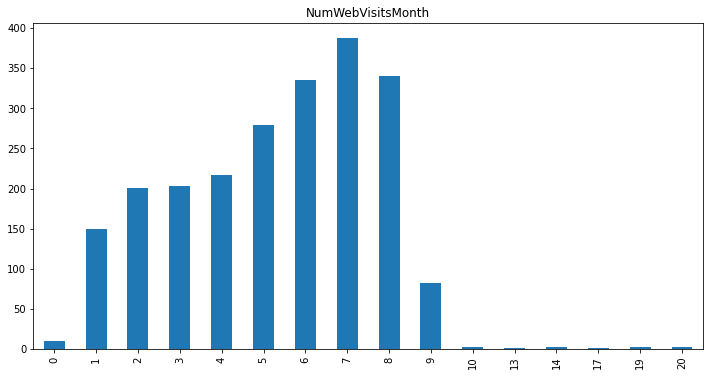

In [16]:
#iteratively create charts of "Year_Birth", "Kidhome", "Teenhome", "Recency", "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth"
strcols=["Year_Birth", "Kidhome", "Teenhome", "Recency", "NumDealsPurchases", "NumWebPurchases", 
         "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth"]


for i in strcols:
    if(i=="Recency"): #the Recency column is alittle funky, its plot needs to be resized
        df[i].value_counts().sort_index(ascending=True).plot(kind="bar", figsize=(20, 6), subplots=True)
    if(i=="Year_Birth"): #not a continuous range of values, also needs resizing
        years=[]
        for x in range(df["Year_Birth"].min(), df['Year_Birth'].max()+1):
            years.append(x)
        yeardf=pd.DataFrame(data={"Year_Birth":years})
        yeardf['Number of Customers']=0
        yeardf.set_index("Year_Birth", inplace=True)
        yearbirthcol=df['Year_Birth'].value_counts()
        print(type(yearbirthcol))
        for y, item in yearbirthcol.iteritems():
            yeardf.loc[y]["Number of Customers"]=item
        yeardf.plot(kind="bar", figsize=(20, 6), subplots=True)
        plt.show()
    else:
        df[i].value_counts().sort_index(ascending=True).plot(kind="bar", figsize=(12, 6), subplots=True)
        plt.show()





Income


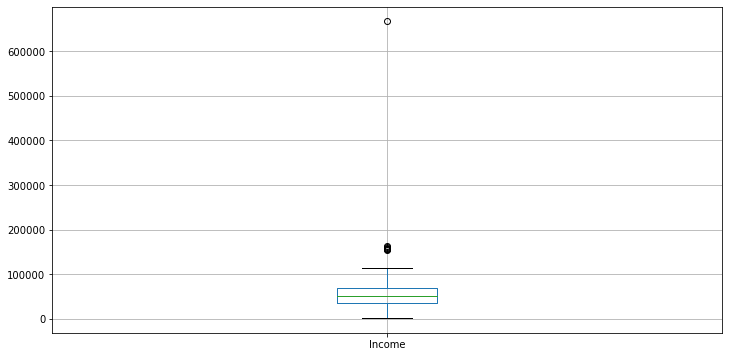





MntWines


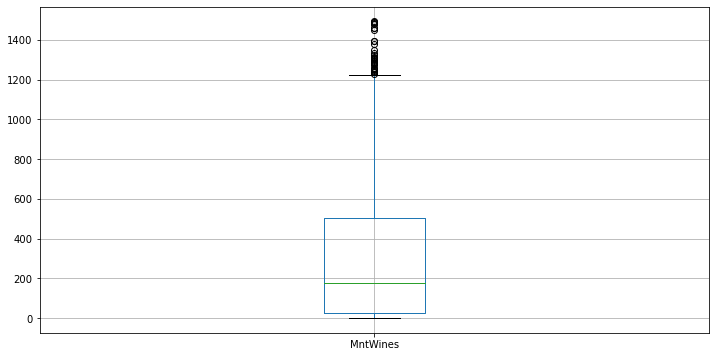





MntFruits


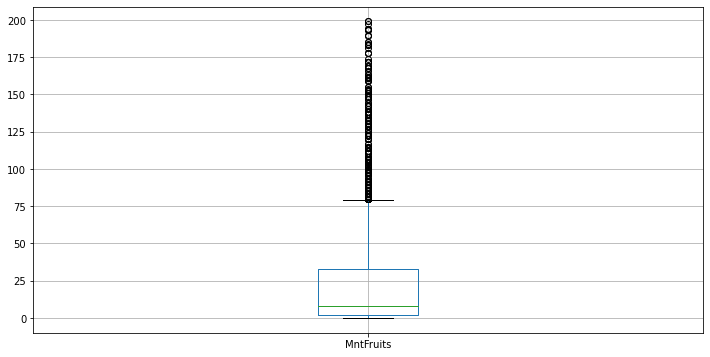





MntMeatProducts


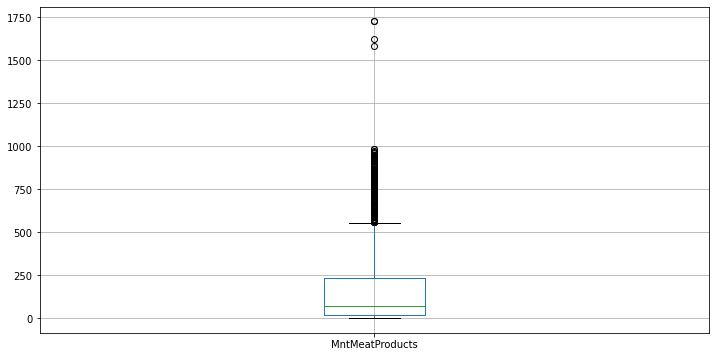





MntFishProducts


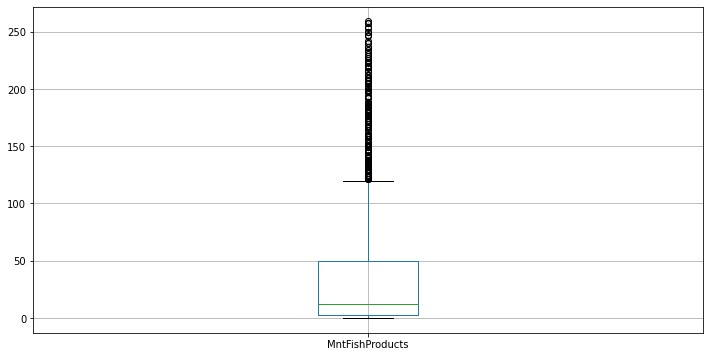





MntSweetProducts


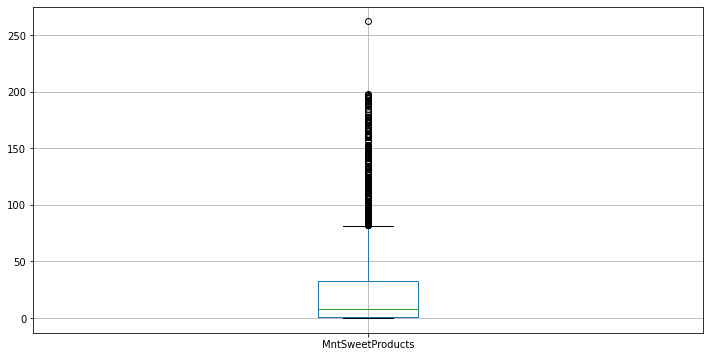





MntGoldProds


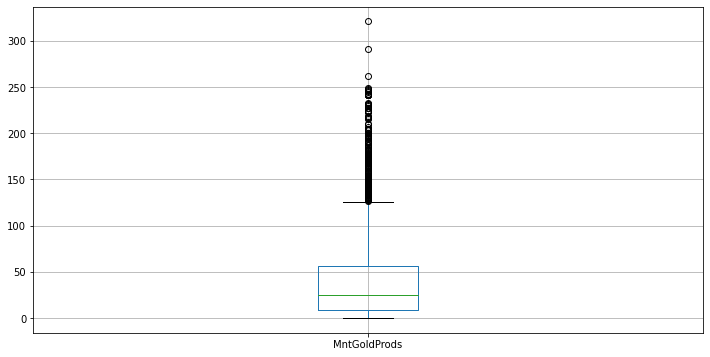

In [17]:
#boxplot for "Income", "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts","MntGoldProds"

numcols=["Income", "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
for i in numcols:
    print("\n\n\n\n"+i)
    df.boxplot(column=i, figsize=(12, 6))
    plt.show()

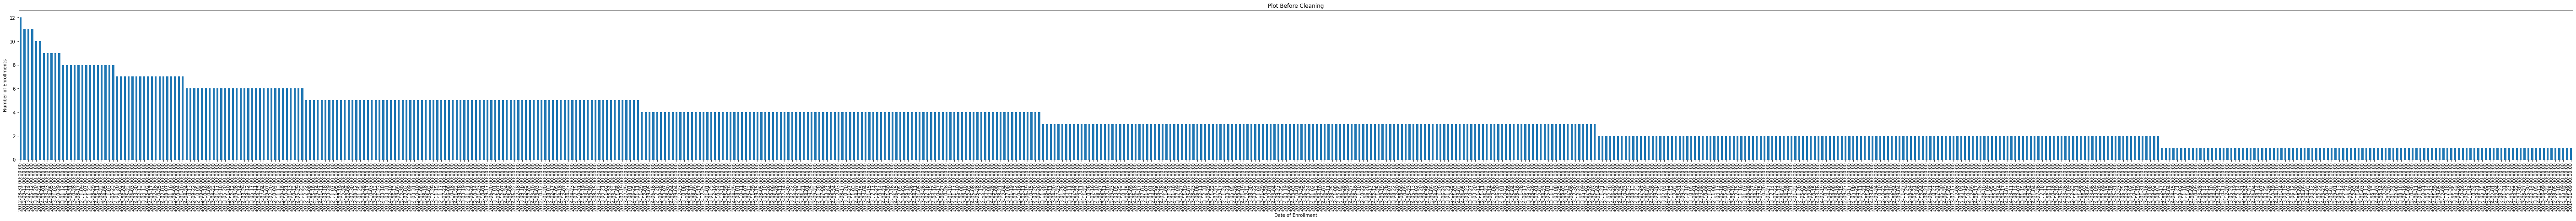

In [18]:
#prepping "Dt_Customer" for plotting

df['Dt_Customer'].value_counts().plot.bar(figsize=(100,6), 
                                          title="Plot Before Cleaning", ylabel="Number of Enrollments", 
                                          xlabel="Date of Enrollment") #You can see that this is not a continuous date range and therefore skewed (if no customer enrolled on a day, that day is not shown)

#creating a df with a continuous date range
daterange=pd.date_range(start=df['Dt_Customer'].dt.date.min(), end=df['Dt_Customer'].dt.date.max(), normalize=True)
datedf=pd.DataFrame(data={"Date":daterange})

enrolls=df["Dt_Customer"].value_counts() #getting all of the dates where there was an enrollment and how many there were
datedf['Enrollments']=0 #creating the enrollment column on the continuous date range dateframe
datedf.set_index("Date", inplace=True) #making it easier to iterate through by date

for i, item in enrolls.iteritems(): #mapping the daily number of enrollments onto the df with the continuous date range
    datedf.loc[i]['Enrollments']=item

<AxesSubplot:title={'center':'Fixed Plot'}, xlabel='Date of Enrollment', ylabel='Number of Enrollments'>

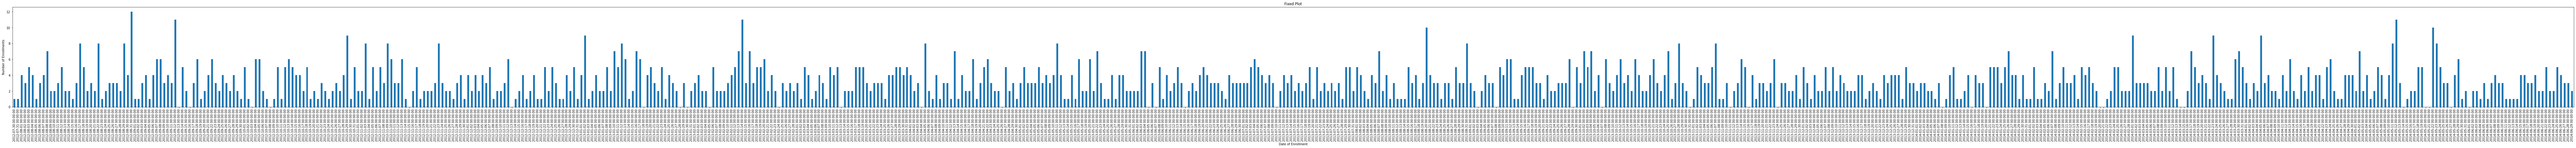

In [19]:
#plotting "Dt_Customer"
datedf['Enrollments'].plot.bar(figsize=(150,6), title="Fixed Plot", ylabel="Number of Enrollments", xlabel="Date of Enrollment")